In [39]:
%pip install kagglehub holidays statsmodels -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data preparation

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download(handle="nicholasjhana/energy-consumption-generation-prices-and-weather")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\rami0\.cache\kagglehub\datasets\nicholasjhana\energy-consumption-generation-prices-and-weather\versions\1


In [3]:
path_energy = path + "/energy_dataset.csv"
path_weather = path + "/weather_features.csv"

# Load the datasets
import pandas as pd

energy_df = pd.read_csv(path_energy)
weather_df = pd.read_csv(path_weather)

In [4]:
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
energy_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [6]:
weather_df.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [7]:
weather_df.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [8]:
print("Unique city names:", weather_df['city_name'].nunique())
print("Unique cities:", weather_df['city_name'].unique())

first_timestamp = weather_df['dt_iso'].min()
print("First timestamp in weather data:", first_timestamp)
count_first_timestamp = weather_df[weather_df['dt_iso'] == first_timestamp].shape[0]
print("Count of first timestamp in weather data:", count_first_timestamp)

Unique city names: 5
Unique cities: ['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']
First timestamp in weather data: 2015-01-01 00:00:00+01:00
Count of first timestamp in weather data: 5


In [9]:
energy_df['time'] = pd.to_datetime(energy_df['time'], utc=True)
energy_df = energy_df.set_index('time')

weather_df['dt_iso'] = pd.to_datetime(weather_df['dt_iso'], utc=True)
weather_df = weather_df.set_index('dt_iso')

In [10]:
# Check for NaN values
print("Energy dataset NaN values:\n", energy_df.isna().sum())

Energy dataset NaN values:
 generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste  

In [11]:
# Print the rows where load actual is NaN
print("Rows with NaN in 'total load actual':")

energy_df[energy_df['total load actual'].isna()]

Rows with NaN in 'total load actual':


,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-05 11:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3932.0,NaN,9258.0,23209.0,NaN,35.50,79.14
2015-01-05 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4236.0,NaN,9156.0,23725.0,NaN,36.80,73.95
2015-01-05 13:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4215.0,NaN,9072.0,23614.0,NaN,32.50,71.93
2015-01-05 14:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4050.0,NaN,8779.0,22381.0,NaN,30.00,71.50
2015-01-05 15:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3728.0,NaN,8426.0,21371.0,NaN,30.00,71.85
2015-01-05 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3175.0,NaN,7946.0,20760.0,NaN,30.60,80.53
2015-01-28 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4136.0,NaN,6223.0,36239.0,NaN,65.00,77.62
2015-02-01 06:00:00+00:00,449.0,312.0,0.0,4765.0,5269.0,222.0,0.0,0.0,0.0,NaN,...,208.0,0.0,3289.0,18.0,NaN,3141.0,24379.0,NaN,56.10,16.98
2015-02-01 07:00:00+00:00,453.0,312.0,0.0,4938.0,5652.0,288.0,0.0,0.0,0.0,NaN,...,207.0,0.0,3102.0,63.0,NaN,3165.0,27389.0,NaN,57.69,19.56


In [12]:
# Replace total load actual with that rows total load forecast
energy_df['total load actual'].fillna(energy_df['total load forecast'], inplace=True)

# Check again for NaN values in total load actual
print("Energy dataset NaN values after filling:\n", energy_df.isna().sum())

Energy dataset NaN values after filling:
 generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
gene

C:\Users\rami0\AppData\Local\Temp\ipykernel_9956\3106263977.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  energy_df['total load actual'].fillna(energy_df['total load forecast'], inplace=True)


In [13]:
print("Weather dataset NaN values:\n", weather_df.isna().sum())

Weather dataset NaN values:
 city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64


In [14]:
# Aggregate weather data across cities:
import numpy as np

def circular_mean_degrees(angles):
    """Calculate circular mean for wind direction in degrees"""
    angles_rad = np.radians(angles)
    sin_mean = np.mean(np.sin(angles_rad))
    cos_mean = np.mean(np.cos(angles_rad))
    return np.degrees(np.arctan2(sin_mean, cos_mean)) % 360

weather_agg = weather_df.groupby(weather_df.index).agg({
    'temp': 'mean',
    'temp_min': 'min',
    'temp_max': 'max',
    'pressure': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean',
    'wind_deg': circular_mean_degrees,
    'rain_1h': 'mean',
    'rain_3h': 'mean', 
    'snow_3h': 'mean',
    'clouds_all': 'mean',
    'weather_id': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]
}).round(2)

print("Aggregated weather data shape:", weather_agg.shape)
print("Sample of aggregated weather data:")
print(weather_agg.head())

Aggregated weather data shape: (35064, 12)
Sample of aggregated weather data:
                             temp  temp_min  temp_max  pressure  humidity  \
dt_iso                                                                      
2014-12-31 23:00:00+00:00  272.49    267.32    281.62    1016.4      82.4   
2015-01-01 00:00:00+00:00  272.51    267.32    281.62    1016.2      82.4   
2015-01-01 01:00:00+00:00  272.10    266.19    281.29    1016.8      82.0   
2015-01-01 02:00:00+00:00  272.09    266.19    281.29    1016.6      82.0   
2015-01-01 03:00:00+00:00  272.15    266.19    281.29    1016.6      82.0   

                           wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  \
dt_iso                                                                       
2014-12-31 23:00:00+00:00         2.0     17.61      0.0      0.0      0.0   
2015-01-01 00:00:00+00:00         2.0     16.30      0.0      0.0      0.0   
2015-01-01 01:00:00+00:00         2.4    356.67      0.0      0.0     

In [15]:
# Drop weather_id
weather_agg = weather_agg.drop(columns=['weather_id'])

print("Weather data columns after aggregation:", weather_agg.columns)

Weather data columns after aggregation: Index(['temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed',
       'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all'],
      dtype='object')


In [16]:
print("Energy dataset shape:", energy_df.shape)
print("Weather dataset shape:", weather_agg.shape)
print("Energy dataset time range:", energy_df.index.min(), "to", energy_df.index.max())
print("Weather dataset time range:", weather_agg.index.min(), "to", weather_agg.index.max())

Energy dataset shape: (35064, 28)
Weather dataset shape: (35064, 11)
Energy dataset time range: 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Weather dataset time range: 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00


# EDA

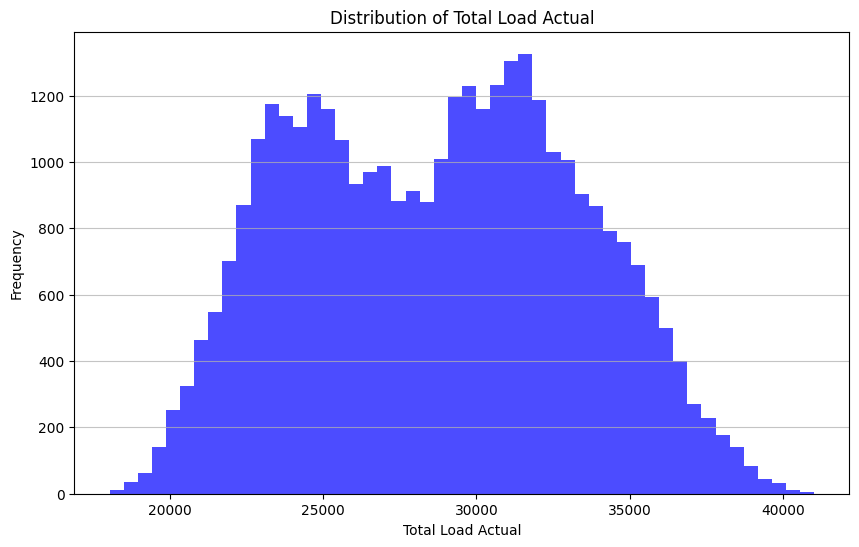

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(energy_df['total load actual'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Total Load Actual')
plt.xlabel('Total Load Actual')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.savefig('total_load_actual_distribution.png')
plt.show()

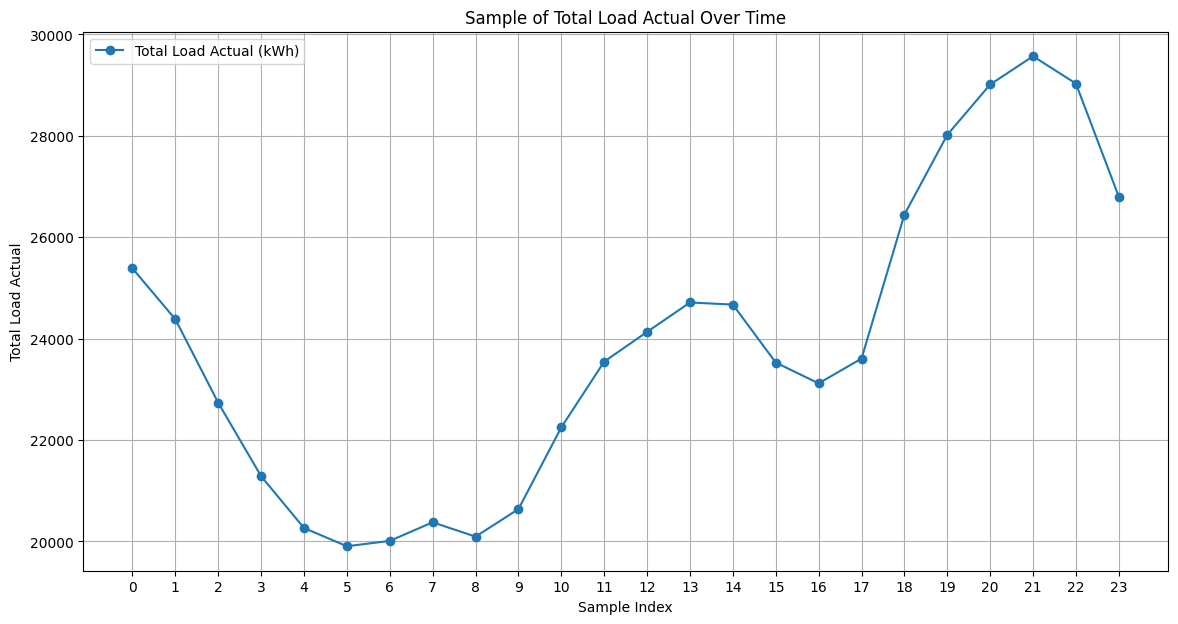

In [37]:
import numpy as np

sample_size = 24
sample_indices = np.arange(sample_size)

plt.figure(figsize=(14, 7))
plt.plot(sample_indices, energy_df['total load actual'].iloc[:sample_size], marker='o', label='Total Load Actual (kWh)')
plt.title('Sample of Total Load Actual Over Time')
plt.xlabel('Sample Index')
plt.ylabel('Total Load Actual')
plt.xticks(sample_indices)
plt.grid()
plt.legend()
plt.savefig('sample_total_load_actual.png')
plt.show()

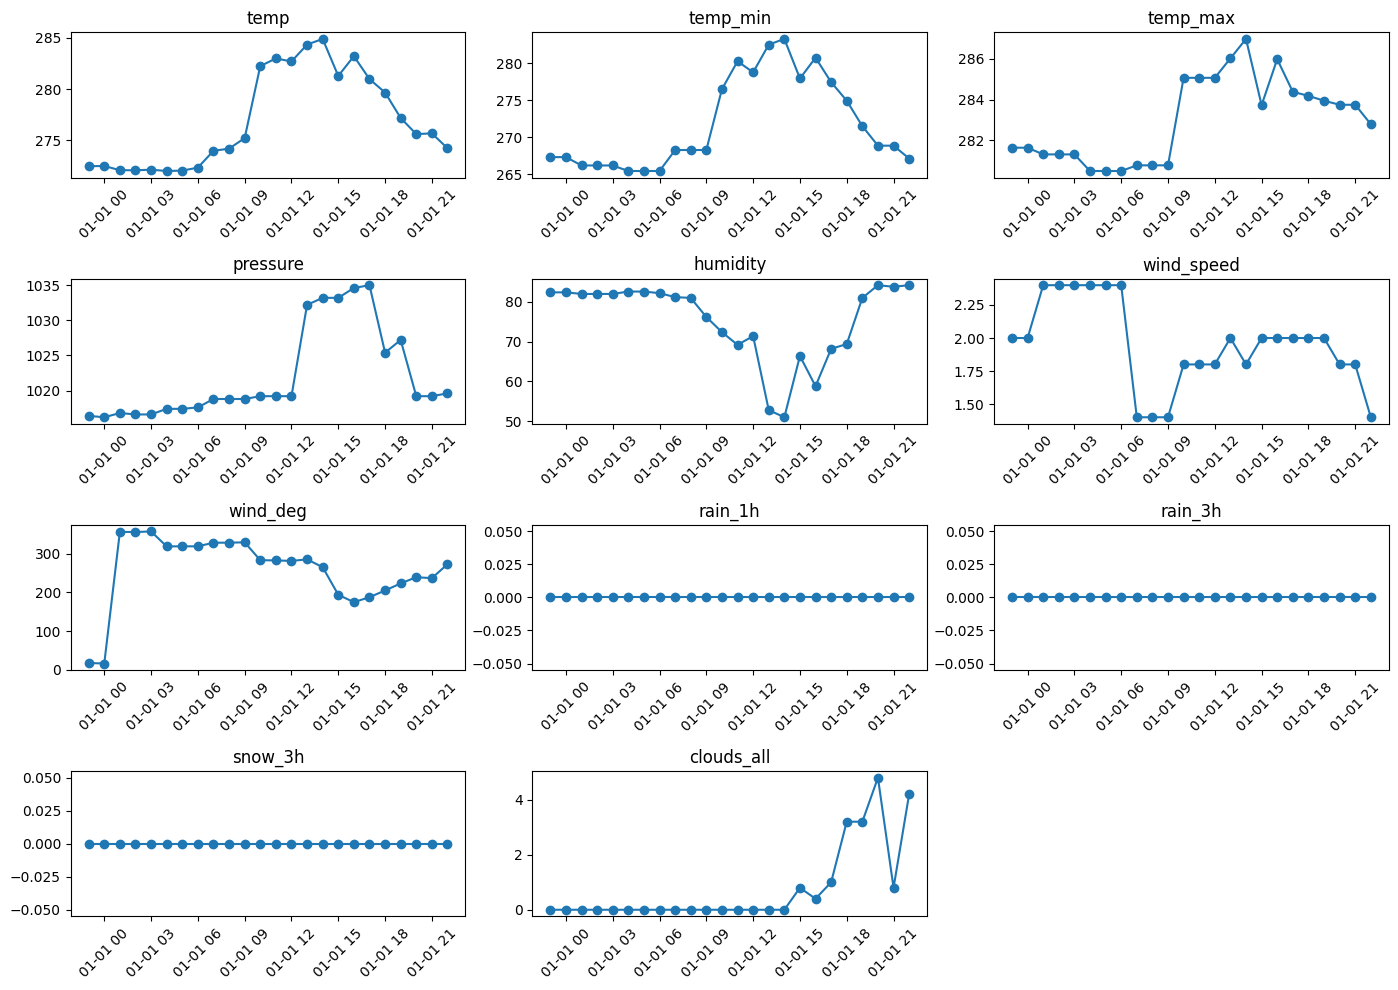

In [38]:
# Plot first 24 hours of all weather features
plt.figure(figsize=(14, 10))
for i, column in enumerate(weather_agg.columns):
    plt.subplot(4, 3, i + 1)
    plt.plot(weather_agg.index[:24], weather_agg[column][:24], marker='o')
    plt.title(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('weather_features_sample.png')
plt.show()

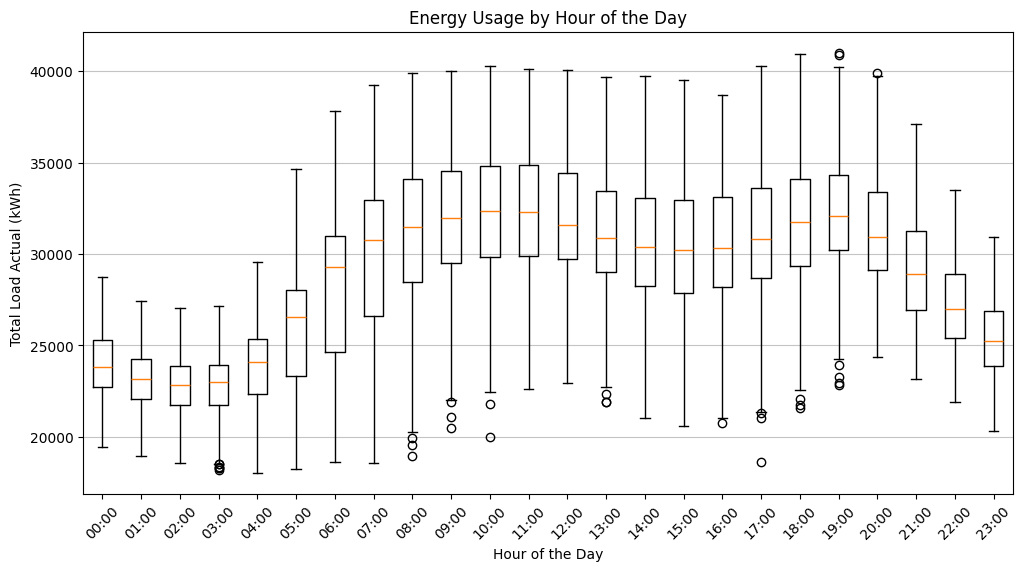

In [39]:
# Create an energy usage boxplot for each hour of the day
plt.figure(figsize=(12, 6))
energy_df['hour'] = energy_df.index.hour
plt.boxplot([energy_df[energy_df['hour'] == hour]['total load actual'] for hour in range(24)],
            labels=[f"{hour:02d}:00" for hour in range(24)])
plt.title('Energy Usage by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Load Actual (kWh)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.savefig('energy_usage_by_hour.png')
plt.show()

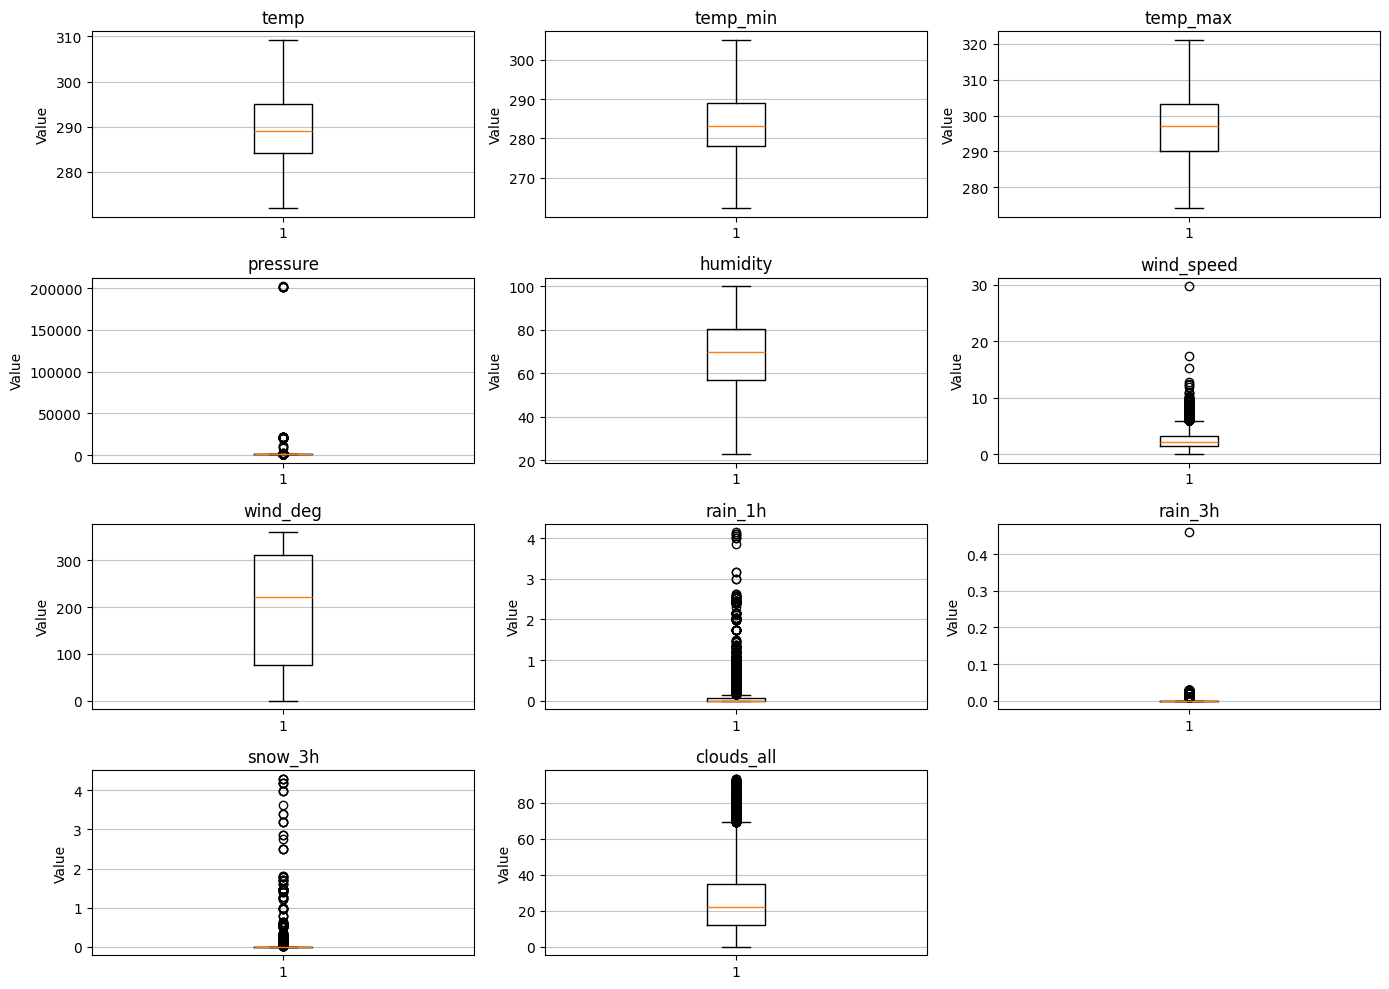

In [40]:
# Create a boxplot for each weather feature
plt.figure(figsize=(14, 10))
for i, column in enumerate(weather_agg.columns):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(weather_agg[column])
    plt.title(column)
    plt.ylabel('Value')
    plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig('weather_features_boxplots.png')
plt.show()

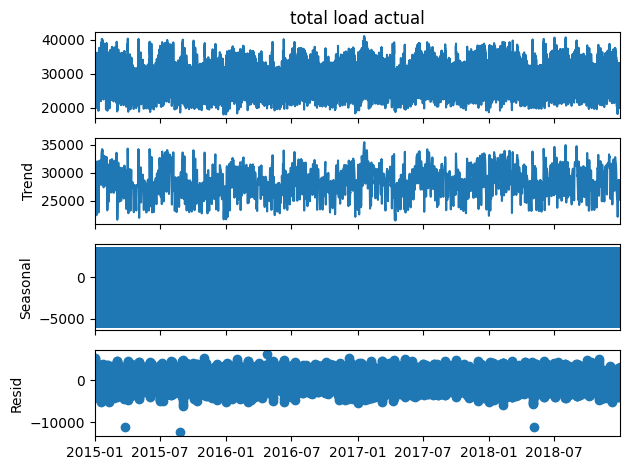

In [22]:
# Use statsmodels to perform a seasonal decomposition of the energy load
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(energy_df['total load actual'], model='additive', period=24)
result.plot()
plt.show()

# Feature engineering

In [23]:
energy_target = energy_df[['total load actual']].copy()

# Merge with weather data
df_merged = energy_target.join(weather_agg, how='left')

print("Merged DataFrame shape:", df_merged.shape)
print("Merged DataFrame columns:", df_merged.columns)

# Save the pre-feature engineering dataset
df_no_feature_engineering = df_merged.copy()
df_no_feature_engineering.to_csv('energy_weather_no_feature_engineering.csv', index=True)

Merged DataFrame shape: (35064, 12)
Merged DataFrame columns: Index(['total load actual', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all'],
      dtype='object')


In [24]:
df_merged['hour'] = df_merged.index.hour
df_merged['day_of_week'] = df_merged.index.dayofweek
df_merged['day_of_year'] = df_merged.index.dayofyear
df_merged['month'] = df_merged.index.month
df_merged['year'] = df_merged.index.year
df_merged['week_of_year'] = df_merged.index.isocalendar().week.astype(int)
df_merged['quarter'] = df_merged.index.quarter

In [25]:
import holidays

es_holidays = holidays.ES(years=df_merged.index.year.unique())
df_merged['is_holiday'] = df_merged.index.to_series().apply(lambda date: 1 if date in es_holidays else 0).values

In [26]:
# Cyclic features for hour and month
df_merged['hour_sin'] = np.sin(2 * np.pi * df_merged['hour'] / 24)
df_merged['hour_cos'] = np.cos(2 * np.pi * df_merged['hour'] / 24)
df_merged['month_sin'] = np.sin(2 * np.pi * df_merged['month'] / 12)
df_merged['month_cos'] = np.cos(2 * np.pi * df_merged['month'] / 12)

In [27]:
target_col = 'total load actual'

# Target variable lags
for i in range(1, 25):
    df_merged[f'{target_col}_lag_{i}'] = df_merged[target_col].shift(i)

df_merged[f'{target_col}_lag_24h_prev_day'] = df_merged[target_col].shift(24)
df_merged[f'{target_col}_lag_168h_prev_week'] = df_merged[target_col].shift(168)

# Weather lags
weather_features = ['temp', 'temp_min', 'temp_max', 'humidity', 'wind_speed', 'rain_1h']

for feature in weather_features:
    for i in range(1, 7):
        df_merged[f'{feature}_lag_{i}'] = df_merged[feature].shift(i)
    
    # Key seasonal lags
    df_merged[f'{feature}_lag_24h_prev_day'] = df_merged[feature].shift(24)
    df_merged[f'{feature}_lag_168h_prev_week'] = df_merged[feature].shift(168)

print(f"Final dataset shape: {df_merged.shape}")
print(f"Total features: {len(df_merged.columns)}")

Final dataset shape: (35064, 98)
Total features: 98


In [28]:
df_merged = df_merged.dropna()

print(f"Dataset shape after dropping NaN: {df_merged.shape}")
print(f"Total features: {len(df_merged.columns)}")

print(f"Remaining NaN values: {df_merged.isna().sum().sum()}")

print(f"Date range: {df_merged.index.min()} to {df_merged.index.max()}")
print(f"Target variable range: {df_merged['total load actual'].min():.2f} to {df_merged['total load actual'].max():.2f}")

Dataset shape after dropping NaN: (34896, 98)
Total features: 98
Remaining NaN values: 0
Date range: 2015-01-07 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Target variable range: 18041.00 to 41015.00


In [29]:
# Save the final dataset
output_path = "energy_consumption_with_weather.csv"
df_merged.to_csv(output_path)

# Baseline model

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

def calculate_mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_model(y_true, y_pred, model_name):
    """Calculate and print evaluation metrics"""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = calculate_mape(y_true, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    
    return {"MAE": mae, "RMSE": rmse, "MAPE": mape}

# Prepare data for time series modeling
target_series = df_merged['total load actual']

# Split data: use last 30 days (720 hours) for testing
test_size = 720
train_size = len(target_series) - test_size

train_data = target_series[:train_size]
test_data = target_series[train_size:]

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Training period: {train_data.index[0]} to {train_data.index[-1]}")
print(f"Test period: {test_data.index[0]} to {test_data.index[-1]}")

# Fit ARIMA model
print("\nFitting ARIMA model...")
arima_model = ARIMA(train_data, order=(2, 1, 2))
arima_fitted = arima_model.fit()

# Make predictions
arima_forecast = arima_fitted.forecast(steps=test_size)

# Evaluate ARIMA model
arima_metrics = evaluate_model(test_data, arima_forecast, "ARIMA(2,1,2)")

# Compare with original forecast from dataset
# Get the original forecast for the same test period
original_forecast_test = energy_df.loc[test_data.index, 'total load forecast']

# Evaluate original forecast
original_metrics = evaluate_model(test_data, original_forecast_test, "Original Dataset Forecast")

# Summary comparison
print("\n" + "="*50)
print("BASELINE MODEL COMPARISON")
print("="*50)
print(f"{'Metric':<10} {'ARIMA':<12} {'Original':<12} {'Better':<10}")
print("-"*50)
print(f"{'MAE':<10} {arima_metrics['MAE']:<12.2f} {original_metrics['MAE']:<12.2f} {'ARIMA' if arima_metrics['MAE'] < original_metrics['MAE'] else 'Original'}")
print(f"{'RMSE':<10} {arima_metrics['RMSE']:<12.2f} {original_metrics['RMSE']:<12.2f} {'ARIMA' if arima_metrics['RMSE'] < original_metrics['RMSE'] else 'Original'}")
print(f"{'MAPE':<10} {arima_metrics['MAPE']:<12.2f} {original_metrics['MAPE']:<12.2f} {'ARIMA' if arima_metrics['MAPE'] < original_metrics['MAPE'] else 'Original'}")

Training data shape: (34176,)
Test data shape: (720,)
Training period: 2015-01-07 23:00:00+00:00 to 2018-12-01 22:00:00+00:00
Test period: 2018-12-01 23:00:00+00:00 to 2018-12-31 22:00:00+00:00

Fitting ARIMA model...

ARIMA(2,1,2) Performance:
MAE:  4593.91
RMSE: 5488.19
MAPE: 17.97%

Original Dataset Forecast Performance:
MAE:  304.16
RMSE: 415.12
MAPE: 1.08%

BASELINE MODEL COMPARISON
Metric     ARIMA        Original     Better    
--------------------------------------------------
MAE        4593.91      304.16       Original
RMSE       5488.19      415.12       Original
MAPE       17.97        1.08         Original


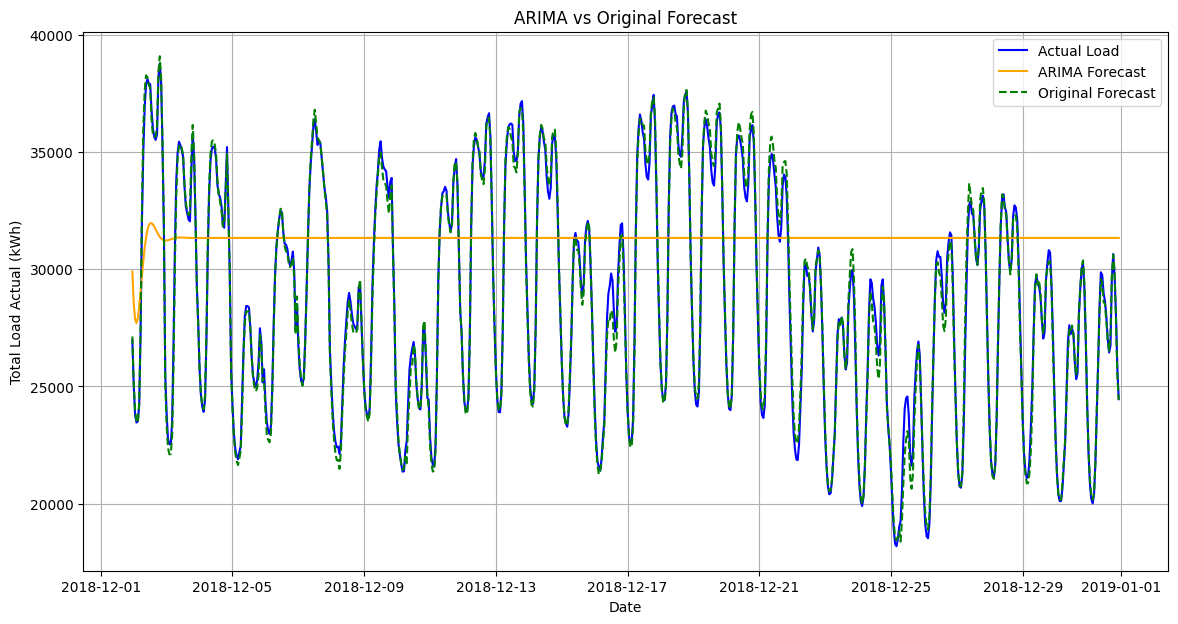

In [41]:
# Plot arima predictions vs original data
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data, label='Actual Load', color='blue')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='orange')
plt.plot(test_data.index, original_forecast_test, label='Original Forecast', color='green', linestyle='--')
plt.title('ARIMA vs Original Forecast')
plt.xlabel('Date')
plt.ylabel('Total Load Actual (kWh)')
plt.legend()
plt.grid()
plt.savefig('arima_vs_original_forecast.png')
plt.show()

In [32]:
# # Try a SARIMA model with a 24-hour seasonal component
# print("\nFitting SARIMA model...")
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# sarima_model = SARIMAX(train_data, order=(2, 1, 2), seasonal_order=(1, 1, 1, 24))
# sarima_fitted = sarima_model.fit()

# # Make predictions with SARIMA
# sarima_forecast = sarima_fitted.forecast(steps=test_size)
# # Evaluate SARIMA model
# sarima_metrics = evaluate_model(test_data, sarima_forecast, "SARIMA(2,1,2)(1,1,1,24)")
# # Compare SARIMA with ARIMA and original forecast
# print("\n" + "="*50)
# print("SARIMA MODEL COMPARISON")
# print("="*50)
# print(f"{'Metric':<10} {'SARIMA':<12} {'ARIMA':<12} {'Original':<12} {'Better':<10}")
# print("-"*50)
# print(f"{'MAE':<10} {sarima_metrics['MAE']:<12.2f} {arima_metrics['MAE']:<12.2f} {original_metrics['MAE']:<12.2f} {'SARIMA' if sarima_metrics['MAE'] < min(arima_metrics['MAE'], original_metrics['MAE']) else 'ARIMA' if arima_metrics['MAE'] < original_metrics['MAE'] else 'Original'}")
# print(f"{'RMSE':<10} {sarima_metrics['RMSE']:<12.2f} {arima_metrics['RMSE']:<12.2f} {original_metrics['RMSE']:<12.2f} {'SARIMA' if sarima_metrics['RMSE'] < min(arima_metrics['RMSE'], original_metrics['RMSE']) else 'ARIMA' if arima_metrics['RMSE'] < original_metrics['RMSE'] else 'Original'}")
# print(f"{'MAPE':<10} {sarima_metrics['MAPE']:<12.2f} {arima_metrics['MAPE']:<12.2f} {original_metrics['MAPE']:<12.2f} {'SARIMA' if sarima_metrics['MAPE'] < min(arima_metrics['MAPE'], original_metrics['MAPE']) else 'ARIMA' if arima_metrics['MAPE'] < original_metrics['MAPE'] else 'Original'}")

```
Fitting SARIMA model...

SARIMA(2,1,2)(1,1,1,24) Performance:
MAE:  8708.84
RMSE: 9753.15
MAPE: 32.69%

==================================================
SARIMA MODEL COMPARISON
==================================================
Metric     SARIMA       ARIMA        Original     Better    
--------------------------------------------------
MAE        8708.84      4593.91      304.16       Original
RMSE       9753.15      5488.19      415.12       Original
MAPE       32.69        17.97        1.08         Original
```

In [33]:
# Fit a new ARIMA model on the data before feature engineering
# Split the data before fitting the model
train_data_pre = df_no_feature_engineering['total load actual'][:train_size]
test_data_pre = df_no_feature_engineering['total load actual'][train_size:train_size+test_size]

arima_model_pre = ARIMA(train_data_pre, order=(2, 1, 2))
arima_fitted_pre = arima_model_pre.fit()

# Make predictions with the pre-feature engineering ARIMA model
arima_forecast_pre = arima_fitted_pre.forecast(steps=test_size)

# Evaluate the pre-feature engineering ARIMA model
arima_metrics_pre = evaluate_model(test_data_pre, arima_forecast_pre, "ARIMA(2,1,2) Pre-Feature Engineering")

# Compare pre-feature engineering ARIMA with ARIMA after feature engineering
print("\n" + "="*50)
print("PRE-FEATURE ENGINEERING ARIMA MODEL COMPARISON")
print("="*50)
print(f"{'Metric':<10} {'Pre-Feature ARIMA':<20} {'ARIMA':<12} {'Better':<10}")
print("-"*50)
print(f"{'MAE':<10} {arima_metrics_pre['MAE']:<20.2f} {arima_metrics['MAE']:<12.2f} {'Pre-Feature ARIMA' if arima_metrics_pre['MAE'] < arima_metrics['MAE'] else 'ARIMA'}")
print(f"{'RMSE':<10} {arima_metrics_pre['RMSE']:<20.2f} {arima_metrics['RMSE']:<12.2f} {'Pre-Feature ARIMA' if arima_metrics_pre['RMSE'] < arima_metrics['RMSE'] else 'ARIMA'}")
print(f"{'MAPE':<10} {arima_metrics_pre['MAPE']:<20.2f} {arima_metrics['MAPE']:<12.2f} {'Pre-Feature ARIMA' if arima_metrics_pre['MAPE'] < arima_metrics['MAPE'] else 'ARIMA'}")


ARIMA(2,1,2) Pre-Feature Engineering Performance:
MAE:  4300.34
RMSE: 4836.69
MAPE: 14.91%

PRE-FEATURE ENGINEERING ARIMA MODEL COMPARISON
Metric     Pre-Feature ARIMA    ARIMA        Better    
--------------------------------------------------
MAE        4300.34              4593.91      Pre-Feature ARIMA
RMSE       4836.69              5488.19      Pre-Feature ARIMA
MAPE       14.91                17.97        Pre-Feature ARIMA


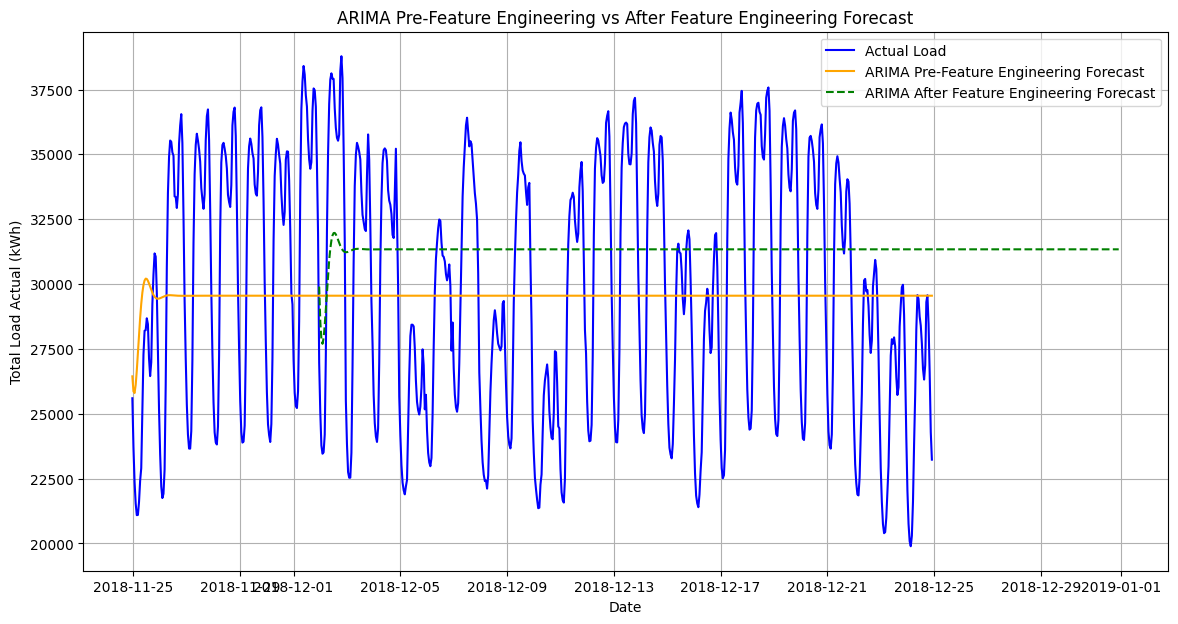

In [42]:
# Plot the pre-feature engineering ARIMA predictions vs original data
plt.figure(figsize=(14, 7))
plt.plot(test_data_pre.index, test_data_pre, label='Actual Load', color='blue')
plt.plot(test_data_pre.index, arima_forecast_pre, label='ARIMA Pre-Feature Engineering Forecast', color='orange')
plt.plot(test_data.index, arima_forecast, label='ARIMA After Feature Engineering Forecast', color='green', linestyle='--')
plt.title('ARIMA Pre-Feature Engineering vs After Feature Engineering Forecast')
plt.xlabel('Date')
plt.ylabel('Total Load Actual (kWh)')
plt.legend()
plt.grid()
plt.savefig('arima_comparison.png')
plt.show()

In [35]:
# Print all columns in the final dataset
print("\nFinal dataset columns:")
for col in df_merged.columns:
    print(col)


Final dataset columns:
total load actual
temp
temp_min
temp_max
pressure
humidity
wind_speed
wind_deg
rain_1h
rain_3h
snow_3h
clouds_all
hour
day_of_week
day_of_year
month
year
week_of_year
quarter
is_holiday
hour_sin
hour_cos
month_sin
month_cos
total load actual_lag_1
total load actual_lag_2
total load actual_lag_3
total load actual_lag_4
total load actual_lag_5
total load actual_lag_6
total load actual_lag_7
total load actual_lag_8
total load actual_lag_9
total load actual_lag_10
total load actual_lag_11
total load actual_lag_12
total load actual_lag_13
total load actual_lag_14
total load actual_lag_15
total load actual_lag_16
total load actual_lag_17
total load actual_lag_18
total load actual_lag_19
total load actual_lag_20
total load actual_lag_21
total load actual_lag_22
total load actual_lag_23
total load actual_lag_24
total load actual_lag_24h_prev_day
total load actual_lag_168h_prev_week
temp_lag_1
temp_lag_2
temp_lag_3
temp_lag_4
temp_lag_5
temp_lag_6
temp_lag_24h_prev_day
t